Loading dataset...
Preprocessing data...
Handling missing values...

=== Exploratory Data Analysis ===

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB
None

Summary Statistics:
              age         sex          cp    trestbps        chol         f

<ipython-input-4-9788b9b98adf>:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


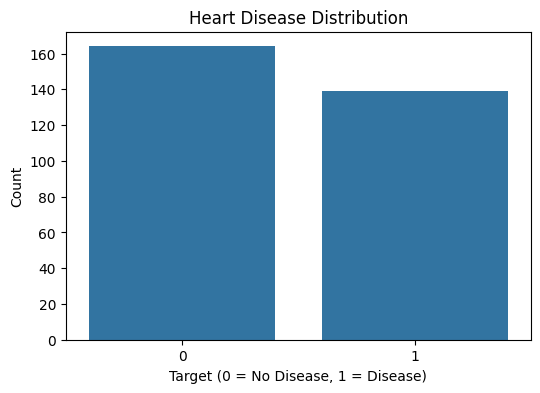

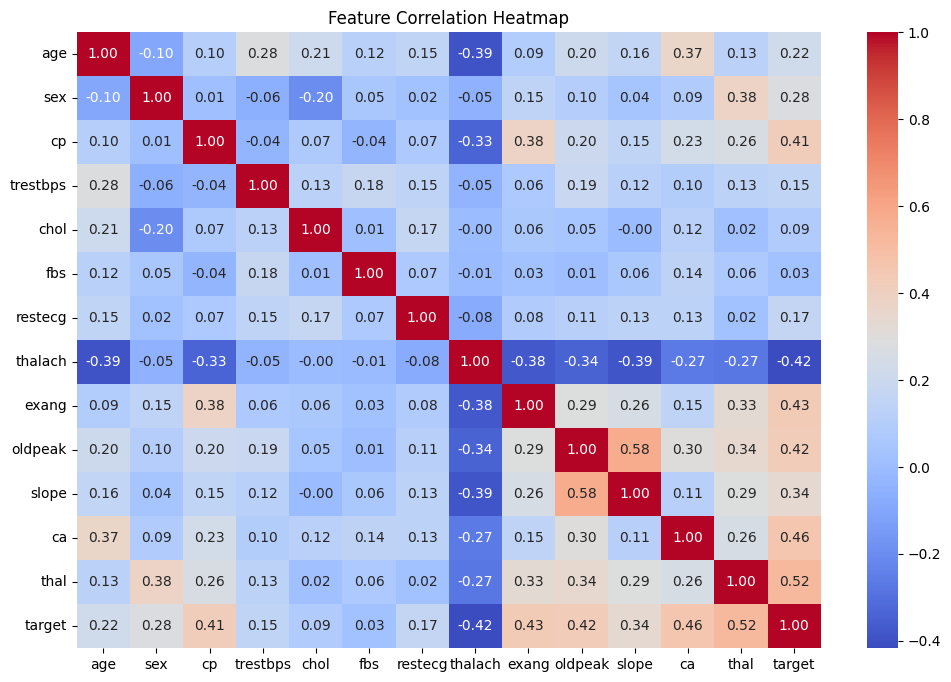


Training Random Forest Classifier...

Model saved as heart_disease_model.pkl

=== Model Evaluation ===

Accuracy: 0.8689


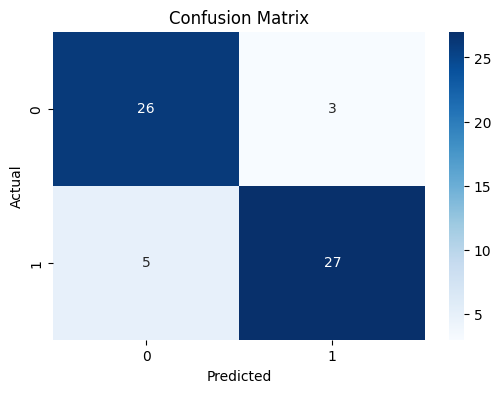


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



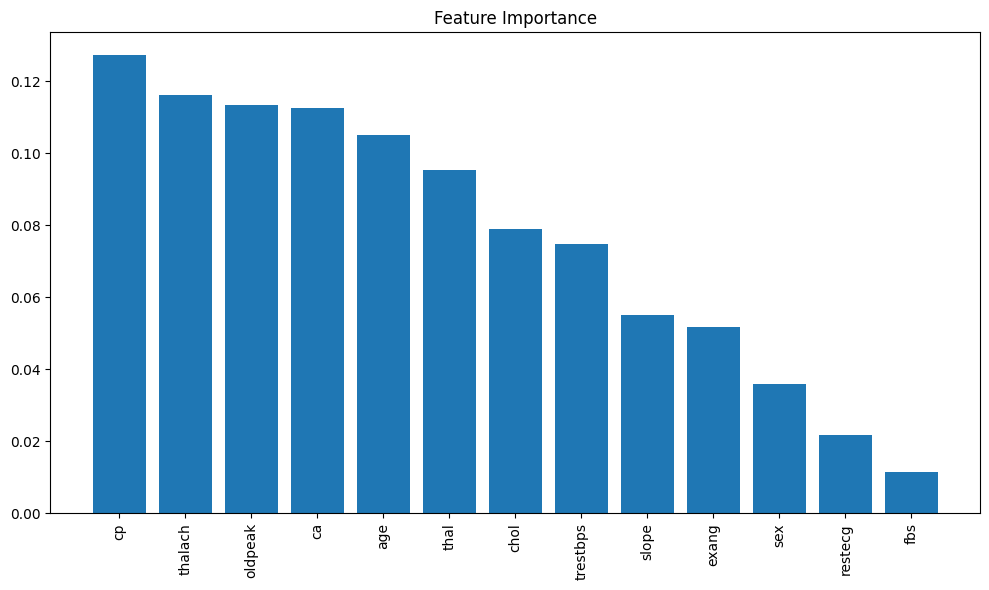


=== Sample Prediction ===

Sample Data Features:
[[ 63.    1.    1.  145.  233.    1.    2.  150.    0.    2.3   3.    0.
    6. ]]

Prediction: No Heart Disease
Actual: No Heart Disease

=== Project Summary ===
Final Model Accuracy: 86.89%
Model: Random Forest Classifier
Dataset: UCI Heart Disease Dataset (processed.cleveland.data)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Load the dataset
def load_data():
    # You can replace this with your actual dataset path
    try:
        # Trying to load from UCI repository (backup option)
        url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
        column_names = [
            'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
            'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
        ]
        data = pd.read_csv(url, names=column_names, na_values='?')
    except:
        # If online loading fails, try local file
        try:
            data = pd.read_csv('heart.csv')
        except:
            print("Failed to load dataset. Please ensure you have the dataset file or internet connection.")
            return None

    return data

# Data preprocessing
def preprocess_data(data):
    # Handle missing values
    if data.isnull().sum().any():
        print("Handling missing values...")
        # For columns with missing values, fill with median or mode
        for col in data.columns:
            if data[col].isnull().sum() > 0:
                if data[col].dtype == 'object':
                    data[col].fillna(data[col].mode()[0], inplace=True)
                else:
                    data[col].fillna(data[col].median(), inplace=True)

    # Convert target to binary (0 = no disease, 1-4 = disease)
    if 'target' in data.columns:
        data['target'] = data['target'].apply(lambda x: 0 if x == 0 else 1)

    return data

# Exploratory Data Analysis (EDA)
def perform_eda(data):
    print("\n=== Exploratory Data Analysis ===\n")

    # Basic info
    print("Dataset Info:")
    print(data.info())

    # Summary statistics
    print("\nSummary Statistics:")
    print(data.describe())

    # Target distribution
    print("\nTarget Variable Distribution:")
    print(data['target'].value_counts())

    # Plot target distribution
    plt.figure(figsize=(6, 4))
    sns.countplot(x='target', data=data)
    plt.title('Heart Disease Distribution')
    plt.xlabel('Target (0 = No Disease, 1 = Disease)')
    plt.ylabel('Count')
    plt.show()

    # Correlation heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Feature Correlation Heatmap')
    plt.show()

# Train and evaluate model
def train_model(X_train, y_train):
    print("\nTraining Random Forest Classifier...")
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test):
    print("\n=== Model Evaluation ===\n")

    # Predictions
    y_pred = model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return accuracy

# Feature importance
def plot_feature_importance(model, features):
    importance = model.feature_importances_
    indices = np.argsort(importance)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title("Feature Importance")
    plt.bar(range(len(importance)), importance[indices], align="center")
    plt.xticks(range(len(importance)), [features.columns[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

# Save model
def save_model(model, filename='heart_disease_model.pkl'):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"\nModel saved as {filename}")

# Load model
def load_model(filename='heart_disease_model.pkl'):
    try:
        with open(filename, 'rb') as file:
            model = pickle.load(file)
        return model
    except:
        return None

# Main function
def main():
    # Load data
    print("Loading dataset...")
    data = load_data()
    if data is None:
        return

    # Preprocess data
    print("Preprocessing data...")
    data = preprocess_data(data)

    # Perform EDA
    perform_eda(data)

    # Prepare features and target
    X = data.drop('target', axis=1)
    y = data['target']

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Feature scaling
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Check if saved model exists
    model = load_model()
    if model is None:
        # Train new model
        model = train_model(X_train, y_train)
        save_model(model)
    else:
        print("\nLoaded pre-trained model")

    # Evaluate model
    accuracy = evaluate_model(model, X_test, y_test)

    # Feature importance
    plot_feature_importance(model, X)

    # Simple prediction interface
    print("\n=== Sample Prediction ===")
    sample_data = X.iloc[0:1].values  # Take first row as sample
    sample_data_scaled = scaler.transform(sample_data)
    prediction = model.predict(sample_data_scaled)
    actual = y.iloc[0]

    print(f"\nSample Data Features:\n{sample_data}")
    print(f"\nPrediction: {'Heart Disease' if prediction[0] == 1 else 'No Heart Disease'}")
    print(f"Actual: {'Heart Disease' if actual == 1 else 'No Heart Disease'}")

    print("\n=== Project Summary ===")
    print(f"Final Model Accuracy: {accuracy:.2%}")
    print("Model: Random Forest Classifier")
    print("Dataset: UCI Heart Disease Dataset (processed.cleveland.data)")

if __name__ == "__main__":
    main()

In [7]:
!pip install flask pyngrok scikit-learn pandas numpy

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import pickle
from flask import Flask, request, render_template
from pyngrok import ngrok

# Load dataset
def load_data():
    try:
        url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
        column_names = [
            'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
            'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
        ]
        data = pd.read_csv(url, names=column_names, na_values='?')
    except Exception as e:
        print("Using local dataset due to error:", e)
        data = pd.read_csv('heart.csv')
    return data

# Preprocess data
def preprocess_data(data):
    # Handle missing values
    for col in data.columns:
        if data[col].isnull().sum() > 0:
            data[col].fillna(data[col].median(), inplace=True)
    # Convert target to binary
    data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)
    return data

# Load or train model and scaler
def load_or_train_model():
    data = load_data()
    data = preprocess_data(data)
    X = data.drop('target', axis=1)
    y = data['target']

    # Train-test split and scaling
    X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    try:
        model = pickle.load(open('model.pkl', 'rb'))
        scaler = pickle.load(open('scaler.pkl', 'rb'))
        print("Loaded pre-trained model")
    except:
        print("Training new model...")
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train_scaled, y_train)
        pickle.dump(model, open('model.pkl', 'wb'))
        pickle.dump(scaler, open('scaler.pkl', 'wb'))
    return model, scaler, X.columns

model, scaler, features = load_or_train_model()

# Flask app setup
app = Flask(_name_)

# Home page with input form
@app.route('/')
def home():
    return render_template('index.html')

# Prediction route
@app.route('/predict', methods=['POST'])
def predict():
    input_data = [float(request.form[col]) if col in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
                  else int(request.form[col]) for col in features]
    scaled_data = scaler.transform([input_data])
    prediction = model.predict(scaled_data)[0]
    result = "Heart Disease" if prediction == 1 else "No Heart Disease"
    return render_template('result.html', prediction=result)

# Create templates
!mkdir -p templates

!pip install flask pyngrok scikit-learn pandas numpy

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import pickle
from flask import Flask, request, render_template
from pyngrok import ngrok

# Load dataset
def load_data():
    try:
        url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
        column_names = [
            'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
            'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
        ]
        data = pd.read_csv(url, names=column_names, na_values='?')
    except Exception as e:
        print("Using local dataset due to error:", e)
        data = pd.read_csv('heart.csv')
    return data

# Preprocess data
def preprocess_data(data):
    # Handle missing values
    for col in data.columns:
        if data[col].isnull().sum() > 0:
            data[col].fillna(data[col].median(), inplace=True)
    # Convert target to binary
    data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)
    return data

# Load or train model and scaler
def load_or_train_model():
    data = load_data()
    data = preprocess_data(data)
    X = data.drop('target', axis=1)
    y = data['target']

    # Train-test split and scaling
    X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    try:
        model = pickle.load(open('model.pkl', 'rb'))
        scaler = pickle.load(open('scaler.pkl', 'rb'))
        print("Loaded pre-trained model")
    except:
        print("Training new model...")
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train_scaled, y_train)
        pickle.dump(model, open('model.pkl', 'wb'))
        pickle.dump(scaler, open('scaler.pkl', 'wb'))
    return model, scaler, X.columns

model, scaler, features = load_or_train_model()

# Flask app setup
app = Flask(__name__)

# Home page with input form
@app.route('/')
def home():
    return render_template('index.html')

# Prediction route
@app.route('/predict', methods=['POST'])
def predict():
    input_data = [float(request.form[col]) if col in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
                  else int(request.form[col]) for col in features]
    scaled_data = scaler.transform([input_data])
    prediction = model.predict(scaled_data)[0]
    result = "Heart Disease" if prediction == 1 else "No Heart Disease"
    return render_template('result.html', prediction=result)

# Create templates
!mkdir -p templates

# HTML template for input form
%%writefile templates/index.html
<html>
<head><title>Heart Disease Prediction</title></head>
<body>
    <h2>Heart Disease Risk Assessment</h2>
    <form method="post" action="/predict">
        Age: <input type="number" name="age" required><br>
        Sex (0=F, 1=M): <input type="number" name="sex" min="0" max="1" required><br>
        Chest Pain Type (0-3): <input type="number" name="cp" min="0" max="3" required><br>
        Resting BP: <input type="number" name="trestbps" required><br>
        Cholesterol: <input type="number" name="chol" required><br>
        Fasting Blood Sugar (0/1): <input type="number" name="fbs" min="0" max="1" required><br>
        Resting ECG (0-2): <input type="number" name="restecg" min="0" max="2" required><br>
        Max Heart Rate: <input type="number" name="thalach" required><br>
        Exercise Angina (0/1): <input type="number" name="exang" min="0" max="1" required><br>
        ST Depression: <input type="number" step="0.1" name="oldpeak" required><br>
        Slope (0-2): <input type="number" name="slope" min="0" max="2" required><br>
        Vessels (0-3): <input type="number" name="ca" min="0" max="3" required><br>
        Thal (3,6,7): <input type="number" name="thal" required><br>
        <input type="submit" value="Predict">
    </form>
</body>
</html>

# HTML template for results
%%writefile templates/result.html
<html>
<head><title>Result</title></head>
<body>
    <h3>Prediction Result: {{ prediction }}</h3>
    <a href="/">New Prediction</a>
</body>
</html>

# Run the app with ngrok
public_url = ngrok.connect(5000).public_url
print(f" * Running at {public_url}")
app.run(port=5000)
    <h2>Heart Disease Risk Assessment</h2>
    <form method="post" action="/predict">
        Age: <input type="number" name="age" required><br>
        Sex (0=F, 1=M): <input type="number" name="sex" min="0" max="1" required><br>
        Chest Pain Type (0-3): <input type="number" name="cp" min="0" max="3" required><br>
        Resting BP: <input type="number" name="trestbps" required><br>
        Cholesterol: <input type="number" name="chol" required><br>
        Fasting Blood Sugar (0/1): <input type="number" name="fbs" min="0" max="1" required><br>
        Resting ECG (0-2): <input type="number" name="restecg" min="0" max="2" required><br>
        Max Heart Rate: <input type="number" name="thalach" required><br>
        Exercise Angina (0/1): <input type="number" name="exang" min="0" max="1" required><br>
        ST Depression: <input type="number" step="0.1" name="oldpeak" required><br>
        Slope (0-2): <input type="number" name="slope" min="0" max="2" required><br>
        Vessels (0-3): <input type="number" name="ca" min="0" max="3" required><br>
        Thal (3,6,7): <input type="number" name="thal" required><br>
        <input type="submit" value="Predict">
    </form>
</body>
</html>

# HTML template for results
%%writefile templates/result.html
<html>
<head><title>Result</title></head>
<body>
    <h3>Prediction Result: {{ prediction }}</h3>
    <a href="/">New Prediction</a>
</body>
</html>

# Run the app with ngrok
public_url = ngrok.connect(5000).public_url
print(f" * Running at {public_url}")
app.run(port=5000)

SyntaxError: invalid syntax (<ipython-input-7-1a679ec1eb32>, line 85)

In [8]:
!pip install flask pyngrok scikit-learn pandas numpy

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import pickle
from flask import Flask, request, render_template
from pyngrok import ngrok

In [10]:
def load_data():
    try:
        url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
        column_names = [
            'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
            'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
        ]
        data = pd.read_csv(url, names=column_names, na_values='?')
    except Exception as e:
        print("Using local dataset due to error:", e)
        data = pd.read_csv('heart.csv')
    return data

def preprocess_data(data):
    for col in data.columns:
        if data[col].isnull().sum() > 0:
            data[col].fillna(data[col].median(), inplace=True)
    data['target'] = data['target'].apply(lambda x: 1 if x > 0 else 0)
    return data

In [11]:
def load_or_train_model():
    data = load_data()
    data = preprocess_data(data)
    X = data.drop('target', axis=1)
    y = data['target']

    X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    try:
        model = pickle.load(open('model.pkl', 'rb'))
        scaler = pickle.load(open('scaler.pkl', 'rb'))
        print("Loaded pre-trained model")
    except:
        print("Training new model...")
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train_scaled, y_train)
        pickle.dump(model, open('model.pkl', 'wb'))
        pickle.dump(scaler, open('scaler.pkl', 'wb'))
    return model, scaler, X.columns

model, scaler, features = load_or_train_model()

Training new model...


<ipython-input-10-1377a4cbb75b>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


In [12]:
!mkdir -p templates

In [13]:
%%writefile templates/index.html
<html>
<head><title>Heart Disease Prediction</title></head>
<body>
    <h2>Heart Disease Risk Assessment</h2>
    <form method="post" action="/predict">
        Age: <input type="number" name="age" required><br>
        Sex (0=F, 1=M): <input type="number" name="sex" min="0" max="1" required><br>
        Chest Pain Type (0-3): <input type="number" name="cp" min="0" max="3" required><br>
        Resting BP: <input type="number" name="trestbps" required><br>
        Cholesterol: <input type="number" name="chol" required><br>
        Fasting Blood Sugar (0/1): <input type="number" name="fbs" min="0" max="1" required><br>
        Resting ECG (0-2): <input type="number" name="restecg" min="0" max="2" required><br>
        Max Heart Rate: <input type="number" name="thalach" required><br>
        Exercise Angina (0/1): <input type="number" name="exang" min="0" max="1" required><br>
        ST Depression: <input type="number" step="0.1" name="oldpeak" required><br>
        Slope (0-2): <input type="number" name="slope" min="0" max="2" required><br>
        Vessels (0-3): <input type="number" name="ca" min="0" max="3" required><br>
        Thal (3,6,7): <input type="number" name="thal" required><br>
        <input type="submit" value="Predict">
    </form>
</body>
</html>

Writing templates/index.html


In [14]:
%%writefile templates/result.html
<html>
<head><title>Result</title></head>
<body>
    <h3>Prediction Result: {{ prediction }}</h3>
    <a href="/">New Prediction</a>
</body>
</html>

Writing templates/result.html


In [15]:
app = Flask(__name__)

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    input_data = [float(request.form[col]) if col in ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
                  else int(request.form[col]) for col in features]
    scaled_data = scaler.transform([input_data])
    prediction = model.predict(scaled_data)[0]
    result = "Heart Disease" if prediction == 1 else "No Heart Disease"
    return render_template('result.html', prediction=result)

In [18]:
from pyngrok import ngrok
NGROK_AUTH_TOKEN = "2wffJEMThAQg0oZx8COzIeFjokd_41DxFr5WtcVcwMNqzBZaf"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

In [20]:

ngrok.set_auth_token("2wffJEMThAQg0oZx8COzIeFjokd_41DxFr5WtcVcwMNqzBZaf")

In [21]:
public_url = ngrok.connect(5000).public_url
print(f" * Running at {public_url}")
app.run(port=5000)

 * Running at https://1983-35-236-244-117.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [05/May/2025 09:35:31] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/May/2025 09:35:31] "GET /favicon.ico HTTP/1.1" 404 -
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [05/May/2025 09:37:02] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [05/May/2025 09:37:06] "GET / HTTP/1.1" 200 -
